In [228]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [202]:
df = pd.read_csv('/Users/rishabh/Desktop/Kaggle/TMDBMovie/tmdb_5000_movies.csv')

In [203]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [204]:
df1 = df[['budget' , 'id','popularity','original_language','runtime','vote_count','vote_average']]

In [205]:
df1.head()

,budget,id,popularity,original_language,runtime,vote_count,vote_average
0,237000000,19995,150.437577,en,162.0,11800,7.2
1,300000000,285,139.082615,en,169.0,4500,6.9
2,245000000,206647,107.376788,en,148.0,4466,6.3
3,250000000,49026,112.312950,en,165.0,9106,7.6
4,260000000,49529,43.926995,en,132.0,2124,6.1


In [206]:
df1.describe()

,budget,id,popularity,runtime,vote_count,vote_average
count,4.803000e+03,4803.000000,4803.000000,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,106.875859,690.217989,6.092172
std,4.072239e+07,88694.614033,31.816650,22.611935,1234.585891,1.194612
min,0.000000e+00,5.000000,0.000000,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,94.000000,54.000000,5.600000
50%,1.500000e+07,14629.000000,12.921594,103.000000,235.000000,6.200000
75%,4.000000e+07,58610.500000,28.313505,118.000000,737.000000,6.800000
max,3.800000e+08,459488.000000,875.581305,338.000000,13752.000000,10.000000


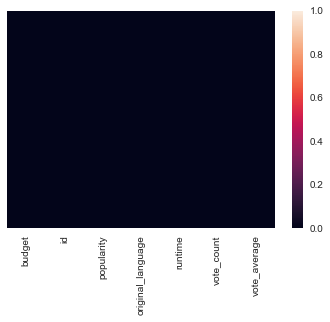

In [207]:
sns.heatmap(df1.isnull(),yticklabels=False)
plt.show()

In [208]:
for name in df1:
    print(name,'=',df1[df1[name]==0][name].count())

budget = 1037
id = 0
popularity = 1
original_language = 0
runtime = 35
vote_count = 62
vote_average = 63


In [209]:
def run(col):
    if(col==0):
        return 106
    else:
        return col
df1['runtime'] = df1['runtime'].apply(run) 
def va(col):
    if(col==0):
        return 6
    else:
        return col
df1['vote_count'] = df1['vote_count'].apply(va)  
def vc(col):
    if(col==0):
        return 690
    else:
        return col
df1['vote_average'] = df1['vote_average'].apply(vc)  

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [210]:
df1.dropna(axis=0,inplace=True)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [211]:
for name in df1:
    print(name,'=',df1[df1[name]==0][name].count())

budget = 1037
id = 0
popularity = 1
original_language = 0
runtime = 0
vote_count = 0
vote_average = 0


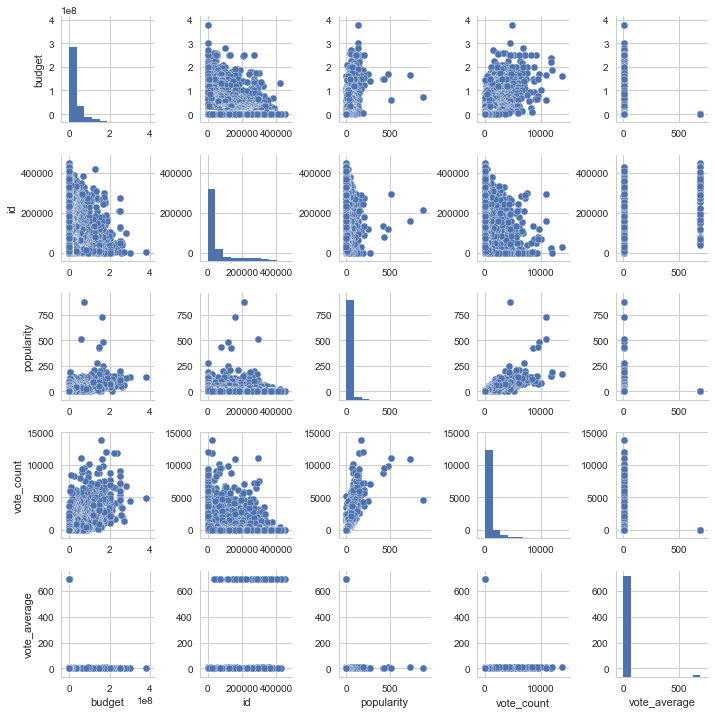

In [212]:
sns.set(style='whitegrid',context='notebook')
cols = ['budget','id','popularity','vote_count','vote_average']
sns.pairplot(df1[cols],size=2)
plt.show()

In [213]:
one_hot = pd.get_dummies(df1['original_language'])
df1 = df1.drop('original_language',axis = 1)

In [214]:
df1 = pd.concat([df1, one_hot],axis = 1)
df1.head()

,budget,id,popularity,runtime,vote_count,vote_average,af,ar,cn,cs,...,ru,sl,sv,ta,te,th,tr,vi,xx,zh
0,237000000,19995,150.437577,162.0,11800,7.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,300000000,285,139.082615,169.0,4500,6.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,245000000,206647,107.376788,148.0,4466,6.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,250000000,49026,112.312950,165.0,9106,7.6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,260000000,49529,43.926995,132.0,2124,6.1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
df['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [216]:
df1 = df1[[c for c in df1 if c not in ['vote_average']] + ['vote_average']]

In [217]:
df1.drop(['id'],inplace=True, axis=1)

In [218]:
df1.drop(['budget'],inplace=True, axis=1)

In [219]:
df1.head()

,popularity,runtime,vote_count,af,ar,cn,cs,da,de,el,...,sl,sv,ta,te,th,tr,vi,xx,zh,vote_average
0,150.437577,162.0,11800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.2
1,139.082615,169.0,4500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.9
2,107.376788,148.0,4466,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.3
3,112.312950,165.0,9106,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.6
4,43.926995,132.0,2124,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.1


In [220]:
df1.describe()

,popularity,runtime,vote_count,af,ar,cn,cs,da,de,el,...,sl,sv,ta,te,th,tr,vi,xx,zh,vote_average
count,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,...,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,21.501089,107.648615,690.579254,0.000208,0.000417,0.002499,0.000417,0.001458,0.005624,0.000208,...,0.000208,0.001041,0.000417,0.000208,0.000625,0.000208,0.000208,0.000208,0.005624,15.003833
std,31.820361,20.674119,1234.721586,0.014432,0.020408,0.049937,0.020408,0.038160,0.074789,0.014432,...,0.014432,0.032258,0.020408,0.014432,0.024992,0.014432,0.014432,0.014432,0.074789,77.220577
min,0.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
25%,4.680206,94.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.600000
50%,12.928269,104.000000,236.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.300000
75%,28.350529,118.000000,737.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.900000
max,875.581305,338.000000,13752.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,690.000000


In [226]:
x_train, x_test, y_train, y_test = train_test_split(df1.iloc[:,0:39],df1.iloc[:,39:40],random_state=0,test_size = 0.2)

In [225]:
from sklearn import preprocessing

x = df1.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [229]:
clf = LinearRegression()

In [230]:
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [232]:
clf.score(x_test,y_test)

-0.00021504708618036436